In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes


## Custom function

In [3]:

def plot_model(model, X, y, degree=None):
    plt.scatter(X, y, color='blue', label='Data points')
    plt.xlabel('X')
    plt.ylabel('y')
    
    # If polynomial regression, plot the curve
    if degree:
        X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        X_pred_poly = PolynomialFeatures(degree=degree).fit_transform(X_pred)
        y_pred = model.predict(X_pred_poly)
        plt.plot(X_pred, y_pred, color='red', label=f'Degree {degree} polynomial regression')
    else:
        # For linear regression, plot the line
        X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_pred = model.predict(X_pred)
        plt.plot(X_pred, y_pred, color='red', label='Linear regression')

    plt.legend()
    plt.show()



## Diabetes data 

In [4]:
print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## Load diabetes data

In [6]:

data = load_diabetes(return_X_y=True, as_frame=True)


## Print data

In [8]:
data[0]


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [17]:
selected_feature = "bmi"

X = data[0][selected_feature].values
X = X.reshape(X.shape[0], 1)
y = data[1].values


## Split the data into training and testing sets

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Fit a linear regression model

In [19]:

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)



LinearRegression()

## Plot the linear regression model

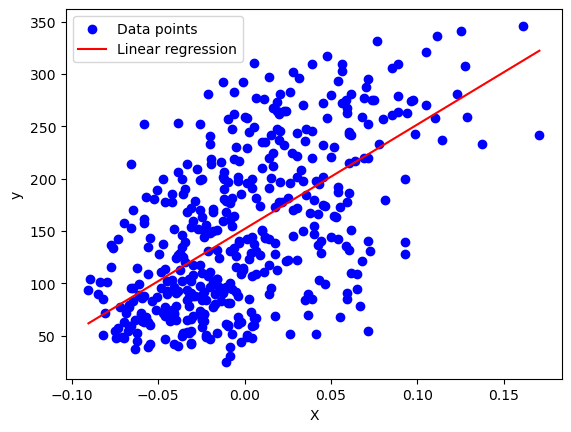

In [20]:

plot_model(linear_model, X, y)


## Evaluate the model on the test set

In [21]:

linear_test_predictions = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_test_predictions)
print(f'Linear Regression Mean Squared Error on Test Set: {linear_mse}')



Linear Regression Mean Squared Error on Test Set: 4061.8259284949268


## Fit a polynomial regression model to demonstrate overfitting

In [42]:

degree = 10
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)




LinearRegression()

## Plot the polynomial regression model

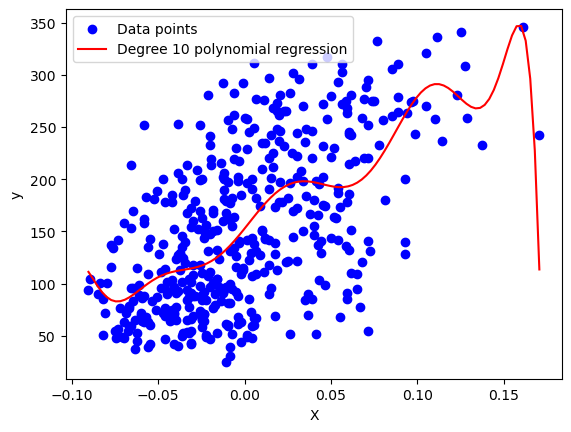

In [43]:

plot_model(poly_model, X, y, degree=degree)


## Evaluate the model on the test set

In [44]:

X_test_poly = poly_features.transform(X_test)
poly_test_predictions = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_test_predictions)
print(f'Polynomial Regression Mean Squared Error on Test Set (Degree {degree}): {poly_mse}')


Polynomial Regression Mean Squared Error on Test Set (Degree 10): 4315.533060006077


## Bar plot to compare Mean Squared Error (MSE)

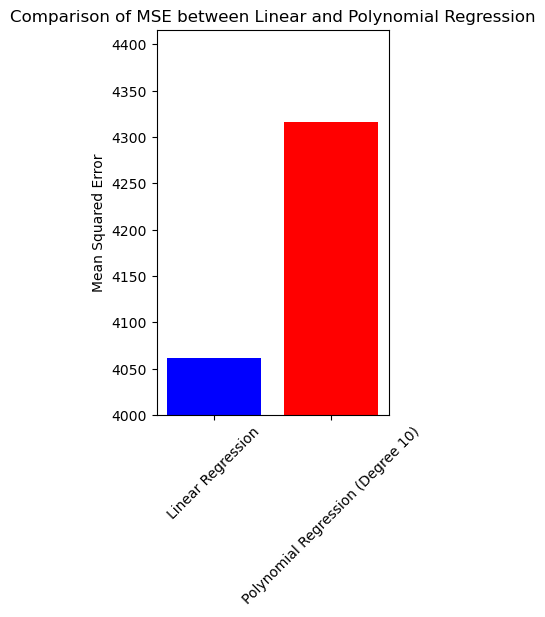

In [54]:
models = ['Linear Regression', f'Polynomial Regression (Degree {degree})']
mse_values = [linear_mse, poly_mse]

plt.figure(figsize=(3, 5))
plt.bar(models, mse_values, color=['blue', 'red'])
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE between Linear and Polynomial Regression')
plt.ylim(4000, max(mse_values) + 100) 
plt.xticks(rotation=45)
plt.show()